In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv(r"india_energy_consumption_2024 (10c).csv")
df

,State,Region,Sector,Energy_Source,Month,Year,Total_Consumption_GWh,Renewable,Import_Export,Quantity_GWh
0,Rajasthan,North,Residential,Nuclear,12,2024,108,No,Export,170
1,Karnataka,West,Residential,Solar,10,2023,2686,No,Export,112
2,Madhya Pradesh,Central,Industrial,Wind,10,2024,2664,No,Import,855
3,Gujarat,East,Industrial,Solar,4,2023,2664,Yes,Import,421
4,Rajasthan,South,Commercial,Solar,7,2023,4528,No,Export,795
...,...,...,...,...,...,...,...,...,...,...
2995,Gujarat,East,Transport,Natural Gas,8,2024,3266,Yes,Export,576
2996,Gujarat,North,Commercial,Natural Gas,1,2024,2889,No,Export,105
2997,Maharashtra,South,Agriculture,Hydro,4,2024,4390,No,Import,176
2998,Andhra Pradesh,South,Residential,Biomass,7,2023,3563,Yes,Export,842


### Q.1 How many unique states are present in the dataset?

In [15]:
df["State"].nunique()


10

###  Q.2 What is the total energy consumption across all states?

In [18]:
df["Total_Consumption_GWh"].sum()


7492502

### Q.3 What is the average energy consumption per sector?

In [21]:
df.groupby("Sector")["Total_Consumption_GWh"].mean()


Sector
Agriculture    2566.453925
Commercial     2513.899818
Industrial     2440.738843
Residential    2538.000000
Transport      2425.969492
Name: Total_Consumption_GWh, dtype: float64

### Q.4 Which state has the highest total energy consumption?

In [27]:
df.groupby("State")["Total_Consumption_GWh"].sum().idxmax()



'Gujarat'

### Q.5  How many records belong to the year 2024?

In [32]:
df[df["Year"] == 2024].shape[0]


1513

### Q.6 What is the distribution of renewable vs non-renewable energy?

In [35]:
df["Renewable"].value_counts()


Renewable
No     1847
Yes    1153
Name: count, dtype: int64

### Q.7 Which sector has the highest total energy consumption?

In [38]:
df.groupby("Sector")["Total_Consumption_GWh"].sum().idxmax()


'Residential'

### Q.8 What is the total energy import and export?

In [41]:
df.groupby("Import_Export")["Quantity_GWh"].sum()


Import_Export
Export    753118
Import    764173
Name: Quantity_GWh, dtype: int64

### Q.9 What is the most used energy source in 2024?

In [43]:
df[df["Year"] == 2024]["Energy_Source"].value_counts().idxmax()


'Nuclear'

### Q.10 How much energy does the Southern region consume?

In [46]:
df[df["Region"] == "South"]["Total_Consumption_GWh"].sum()


1512443

### Q.11 Show the trend of energy consumption over months using line chart.

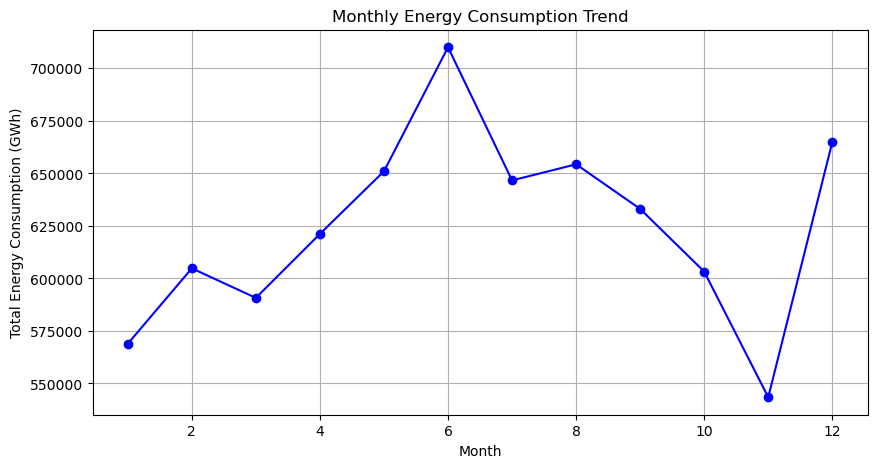

In [48]:
df_grouped = df.groupby("Month")["Total_Consumption_GWh"].sum()
df_grouped.plot(kind="line", marker="o", figsize=(10, 5), color="blue")
plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (GWh)")
plt.title("Monthly Energy Consumption Trend")
plt.grid(True)
plt.show()


### Q.12 How do you Compare renewable vs non-renewable energy consumption by using Pie Chart.

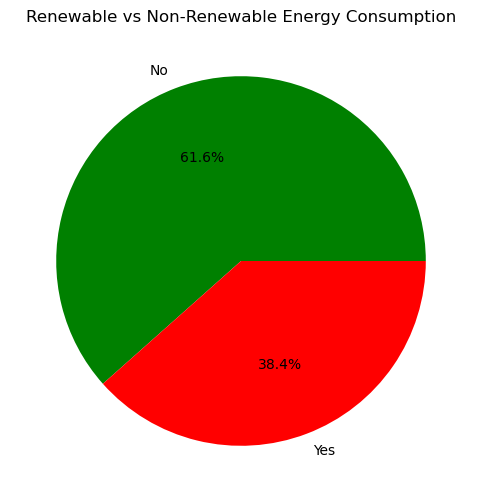

In [51]:
df_grouped = df["Renewable"].value_counts()
df_grouped.plot(kind="pie", autopct="%1.1f%%", colors=["green", "red"], figsize=(6,6))
plt.title("Renewable vs Non-Renewable Energy Consumption")
plt.ylabel("")
plt.show()


### Q.13 Show the distribution of energy sources used using Bar Chart.

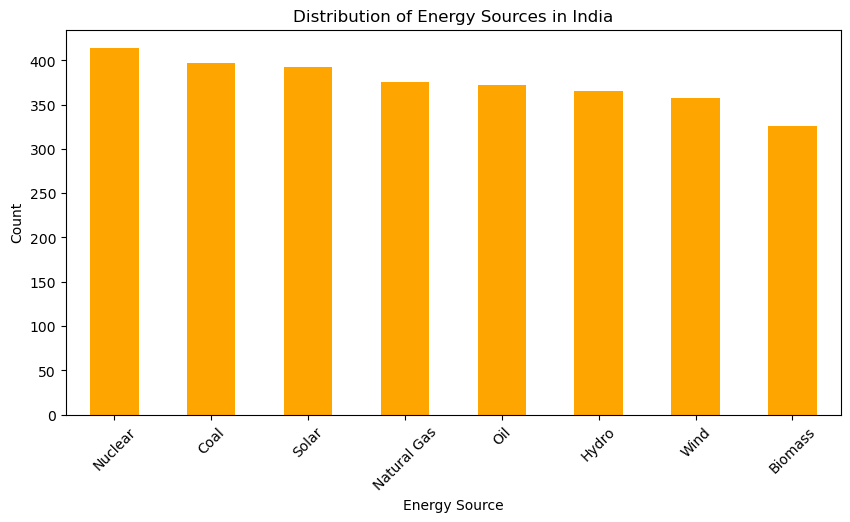

In [55]:
df_grouped = df["Energy_Source"].value_counts()
df_grouped.plot(kind="bar", color="orange", figsize=(10, 5))
plt.xlabel("Energy Source")
plt.ylabel("Count")
plt.title("Distribution of Energy Sources in India")
plt.xticks(rotation=45)
plt.show()


### Q.14 How do you Compare top 5 states with highest energy consumption using Bar Chart

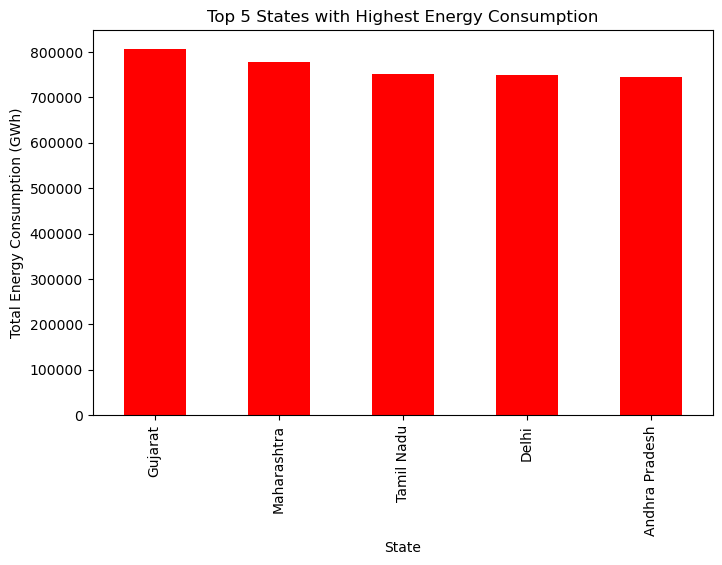

In [62]:
df_grouped = df.groupby("State")["Total_Consumption_GWh"].sum().nlargest(5)
df_grouped.plot(kind="bar", figsize=(8, 5), color="red")
plt.xlabel("State")
plt.ylabel("Total Energy Consumption (GWh)")
plt.title("Top 5 States with Highest Energy Consumption")
plt.show()


### Q.15 Show energy consumption trends by state by using Line Chart

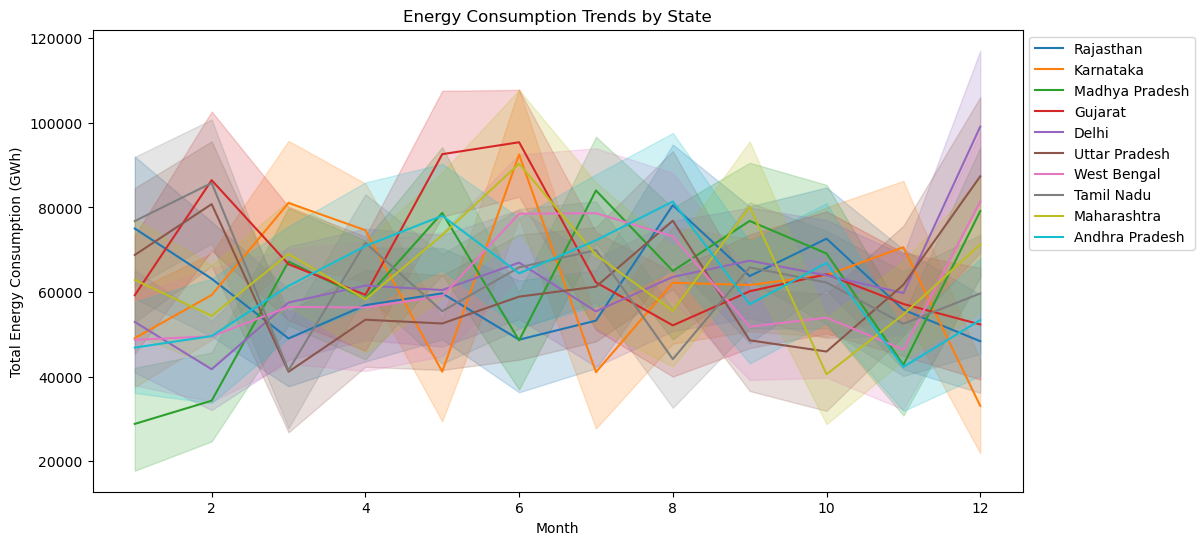

In [67]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Total_Consumption_GWh", hue="State", estimator="sum")
plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (GWh)")
plt.title("Energy Consumption Trends by State")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


### Q.16 How do you Compare total energy consumption by region (Bar Chart)

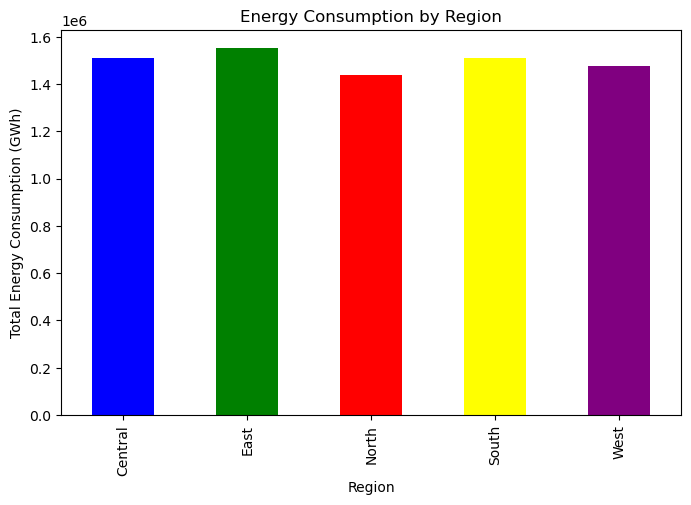

In [69]:
df_grouped = df.groupby("Region")["Total_Consumption_GWh"].sum()
df_grouped.plot(kind="bar", figsize=(8, 5), color=["blue", "green", "red", "yellow", "purple"])
plt.xlabel("Region")
plt.ylabel("Total Energy Consumption (GWh)")
plt.title("Energy Consumption by Region")
plt.show()


### Q.17 Compare energy consumption by different sectors (Horizontal Bar Chart)?

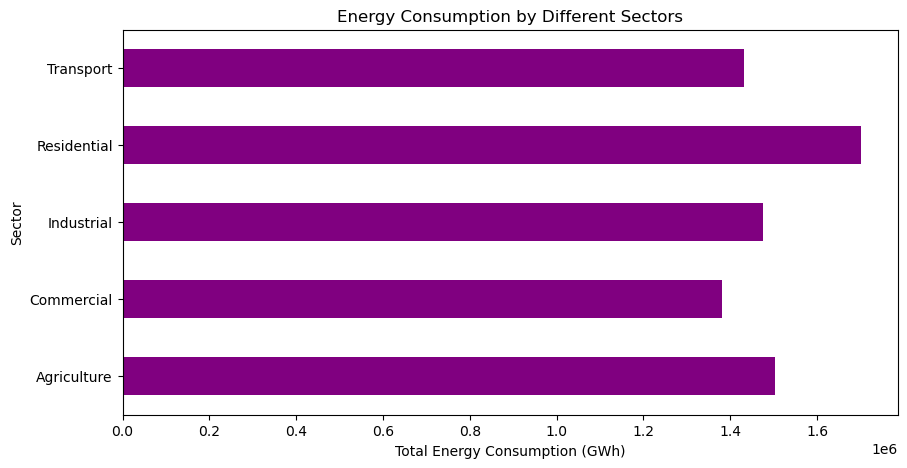

In [72]:
df_grouped = df.groupby("Sector")["Total_Consumption_GWh"].sum()
df_grouped.plot(kind="barh", figsize=(10, 5), color="purple")
plt.xlabel("Total Energy Consumption (GWh)")
plt.ylabel("Sector")
plt.title("Energy Consumption by Different Sectors")
plt.show()


### Q.18  How do you Compare total energy consumption by state (Bar Chart)?

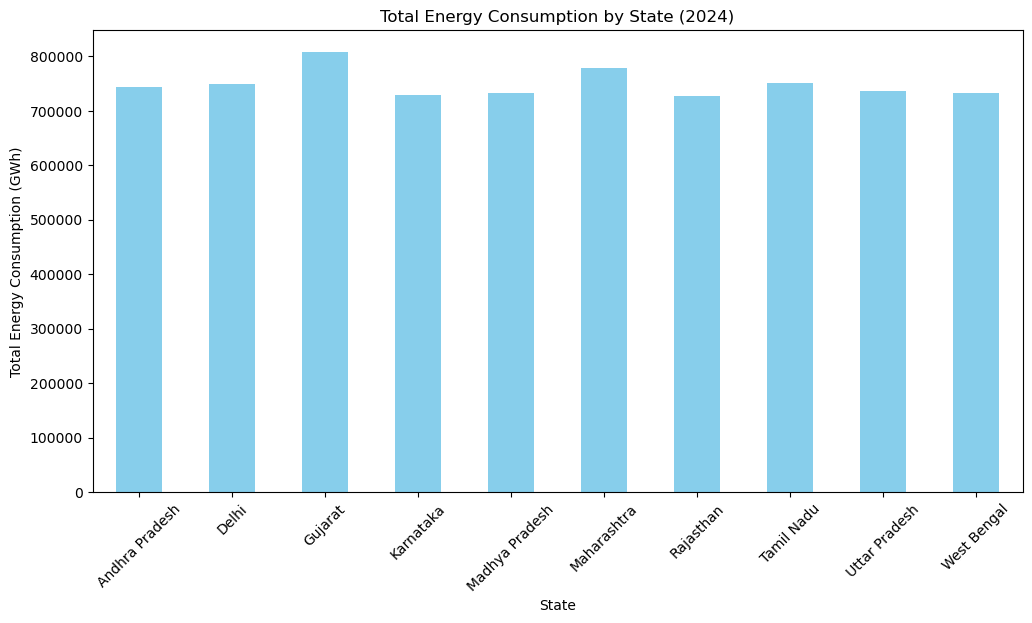

In [75]:
import matplotlib.pyplot as plt

df_grouped = df.groupby("State")["Total_Consumption_GWh"].sum()
df_grouped.plot(kind="bar", figsize=(12, 6), color="skyblue")
plt.xlabel("State")
plt.ylabel("Total Energy Consumption (GWh)")
plt.title("Total Energy Consumption by State (2024)")
plt.xticks(rotation=45)
plt.show()
